In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48
12979,2012-06-30 0:00:00,3,0,0,3,26.24,28.790,89.0,11.0014,4,65,69


In [6]:
df.shape

(12980, 12)

In [7]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [9]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

Count is our target variable as it is not present in the test dataset.

In [11]:
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12975,False,False,False,False,False,False,False,False,False,False,False,False
12976,False,False,False,False,False,False,False,False,False,False,False,False
12977,False,False,False,False,False,False,False,False,False,False,False,False
12978,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the train dataset.

In [13]:
categories = []
numerical = []
for i in df.columns:
    if(df[i].dtypes == 'object'):
        categories.append(i)
    else:
        numerical.append(i)

In [14]:
print("Categorical Value: \n", categories)
print("\nContinuous Value: \n", numerical)

Categorical Value: 
 ['datetime']

Continuous Value: 
 ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


# Univariate Analysis

In [15]:
def analysis(feature):
    sns.set_style('darkgrid')
    plt.figure(figsize=(8,6))
    sns.distplot(df[feature])
    plt.show()

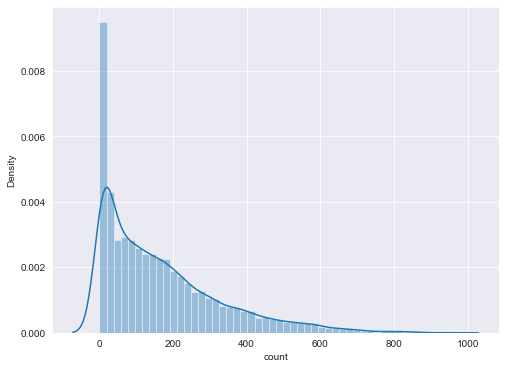

In [16]:
analysis('count')

The distribution is right skewed hence we can take the log of the variable and see if the distribution becomes normal.

<AxesSubplot:xlabel='count', ylabel='Density'>

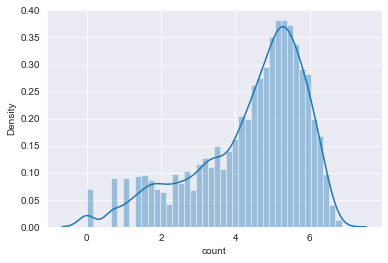

In [17]:
sns.distplot(np.log(df["count"]))

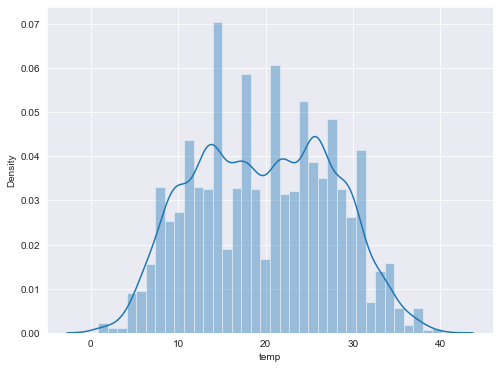

In [18]:
analysis('temp')

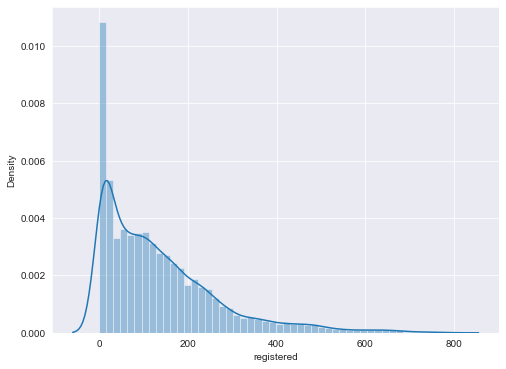

In [19]:
analysis('registered')

# Bivariate Analysis

In [20]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762,0.104657,0.085699,0.100687
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646,0.029135,-0.046053,-0.029340
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986,-0.307930,0.131819,0.018842
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120,-0.161752,-0.139034,-0.161018
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.104657,0.029135,-0.307930,-0.161752,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.085699,-0.046053,0.131819,-0.139034,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329


<AxesSubplot:>

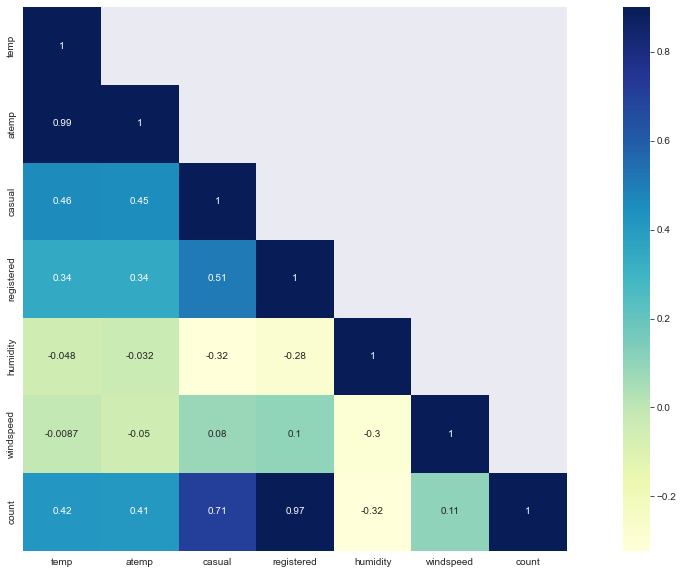

In [21]:
# looking at the correlation between numerical variables
corr = df[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

1. We can infer from the above heatmap that features like "temp" and "atemp" are highly correlated with the target i.e. count.
2. Humidity has got negative correlation with the "count".
3. Since "temp" and "atemp" has got strong correlation with each other, during model building any of the feature has to be dropped since they will exhibit multicollinearity in the data.

# Outlier Handling

<AxesSubplot:xlabel='windspeed'>

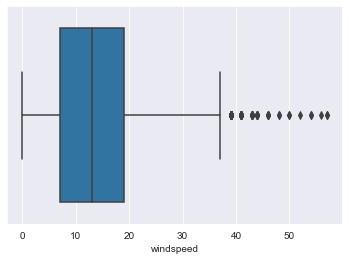

In [22]:
sns.boxplot(df['windspeed'])

In [23]:
q1 = df['windspeed'].quantile(0.25)
q3 = df['windspeed'].quantile(0.75)
iqr = q3 - q1

q1, q3, iqr

(7.0015, 19.0012, 11.9997)

In [24]:
upper_limit = q3 + (1.25 * iqr)
lower_limit = q1 - (1.25 * iqr)

upper_limit, lower_limit

(34.000825000000006, -7.998125000000002)

In [25]:
new_df = df.copy()

In [26]:
# Capping i.e. we are equating the values of outlier to the upper and lower limit

new_df.loc[(df['windspeed']>upper_limit), 'windspeed'] = upper_limit
new_df.loc[(df['windspeed']<lower_limit), 'windspeed'] = lower_limit

<AxesSubplot:xlabel='windspeed'>

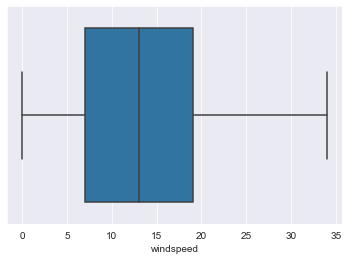

In [27]:
sns.boxplot(new_df['windspeed'])

In [28]:
# extracting date, hour and month from the datetime

df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df["month"] = df.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [29]:
# we have to do the same changes in the test dataset

test_df["date"] = test_df.datetime.apply(lambda x : x.split()[0])
test_df["hour"] = test_df.datetime.apply(lambda x : x.split()[1].split(":")[0])
test_df["month"] = test_df.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

since the the data is time based, we will split it as per time. Let's take first 15 month for training and remaing 3 months in the validation set

In [30]:
train = df[df['datetime']<='2012-03-30 0:00:00']
valid = df[df['datetime']>'2012-03-30 0:00:00']

In [31]:
# we will drop the datetime, date variable as we have already extracted features from these variables.
# we will also drop atemp variable as we saw that it is highly correlated with the temp variable.

df = df.drop(['datetime', 'date', 'atemp'], axis=1)
test_df = test_df.drop(['datetime', 'date', 'atemp'], axis=1)
train = train.drop(['datetime', 'date', 'temp'], axis=1)
valid = valid.drop(['datetime', 'date', 'temp'], axis=1)

# Model Building

# Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lreg = LinearRegression()

we saw in the visualization that the target variable is right skewed so we will take log of this variable before feeding it to the model.

In [34]:
x_train = train.drop('count', 1)
y_train = np.log(train['count'])
x_val = valid.drop('count', 1)
y_val = np.log(valid['count'])

In [35]:
#checking the shape of x_train, y_train, x_val, y_val
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [36]:
lreg.fit(x_train, y_train)

LinearRegression()

In [37]:
prediction = lreg.predict(x_val)

In [38]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [39]:
rmsle(y_val, prediction)

0.8864454993421383

In [40]:
lreg.score(x_val, y_val)

0.6088694328788631

# Descision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [43]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [44]:
predict = dt_reg.predict(x_val)

In [45]:
rmsle(y_val, predict)

0.17102267399447016

In [46]:
dt_reg.score(x_val, y_val)

0.9854646402253986

In [47]:
test_prediction = dt_reg.predict(test_df)

These are log values and we have to convert them back to the original scale.

In [48]:
final_prediction = np.exp(test_prediction)

We will save the prediction on test dataset in csv file.

In [49]:
Test_Prediction = pd.DataFrame()

In [50]:
Test_Prediction['count'] = final_prediction

In [51]:
Test_Prediction.to_csv('Test_Prediction.csv', header=True, index=False)